In [1]:
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
t = pd.read_csv('./KO.csv', index_col=0)

In [3]:
t

,Day 0,Day 1,Day 2,Day 3,Day 1.1,Day 2.1,Day 3.1,Day 1.2,Day 2.2,Day 3.2
pH,7.54700,7.575000,7.558000,7.532000,7.542000,7.512000,7.467000,7.552000,7.546000,7.532000
Glucose(mmol/L),16.76325,17.540354,16.874265,16.374697,17.318324,16.485712,15.042519,17.040787,17.373832,16.652235
Lactate(mmol/L),0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.441385,0.000000,0.000000,0.000000
Glutamine(mmol/L),1.93000,1.980000,1.800000,1.690000,1.900000,1.570000,1.370000,1.920000,1.730000,1.590000
Glutamate(mmol/L),0.32000,0.000000,0.260000,0.250000,0.220000,0.460000,0.530000,0.000000,0.310000,0.250000
Na(mmol/L),149.00000,153.000000,157.000000,160.000000,153.000000,157.000000,160.000000,153.000000,156.000000,158.000000
K(mmol/L),4.20000,4.300000,4.400000,4.500000,4.300000,4.400000,4.500000,4.300000,4.400000,4.400000
NH4(mmol/L),0.41000,0.510000,0.620000,0.680000,0.540000,0.730000,0.900000,0.510000,0.640000,0.720000


In [4]:
x=np.array([0, 1, 2, 3])

In [5]:
def nonlinear_fit(x,a,b):
    return  b - a*np.exp(np.log(2)/20.3*24*x)

In [6]:
f = [
    'Glucose(mmol/L)', 'Lactate(mmol/L)', 
    'Glutamate(mmol/L)', 'NH4(mmol/L)'
]

### Control

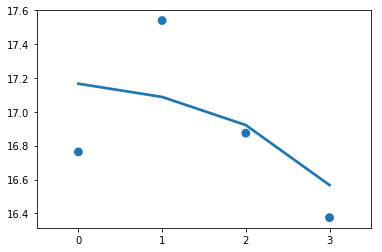

[17.16666168 17.07885935 16.87960694 16.4274376 ]
Glucose(mmol/L)


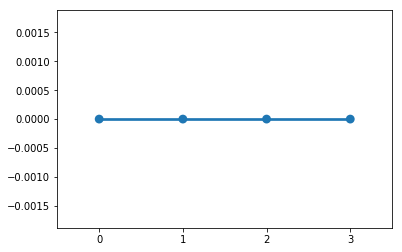

[-5.e-324 -5.e-324 -5.e-324 -5.e-324]
Lactate(mmol/L)


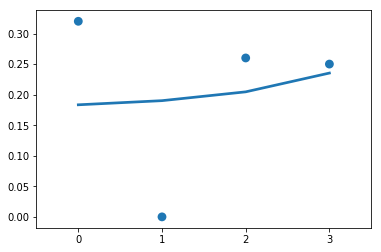

[0.18336851 0.19097586 0.20823944 0.2474162 ]
Glutamate(mmol/L)


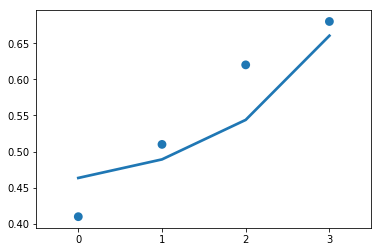

[0.46356455 0.49238918 0.55780178 0.7062445 ]
NH4(mmol/L)


In [7]:
for i in f:
    y=np.array(list(t[['Day 0', 'Day 1', 'Day 2', 'Day 3']].T[i]))
    param, cov = curve_fit(nonlinear_fit, x, y, p0=[1, 3])
    list_y = []
    for num in x:
        list_y.append( param[1] - param[0]* np.exp(np.log(2)/22*24*num))
        
    sns.pointplot(x=x, y=y, join=False)
    sns.pointplot(x=x, y=np.array(list_y), markers="")
    plt.show()
    print(nonlinear_fit(x, param[0], param[1]))
    print(i)

In [8]:
t.columns

Index(['Day 0', 'Day 1', 'Day 2', 'Day 3', 'Day 1.1', 'Day 2.1', 'Day 3.1',
       'Day 1.2', 'Day 2.2', 'Day 3.2'],
      dtype='object')

### Clone A

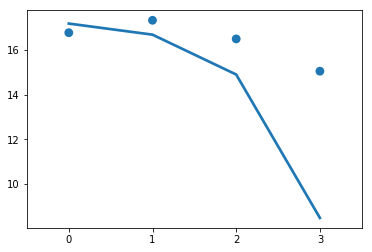

[17.17157671 16.92911318 16.37888357 15.13023138]
Glucose(mmol/L)


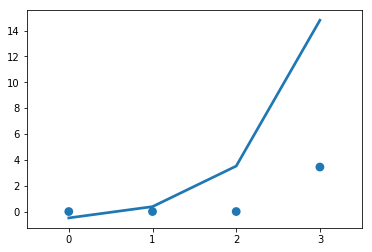

[-0.49309001 -0.06642498  0.90181852  3.0990819 ]
Lactate(mmol/L)


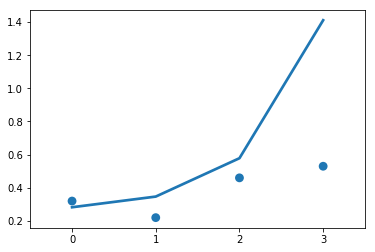

[0.28260998 0.31409988 0.38556084 0.5477293 ]
Glutamate(mmol/L)


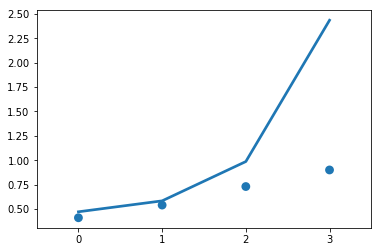

[0.47112523 0.52593851 0.65032789 0.93260836]
NH4(mmol/L)


In [9]:
for i in f:
    y=np.array(list(t[['Day 0', 'Day 1.1', 'Day 2.1', 'Day 3.1']].T[i]))
    param, cov = curve_fit(nonlinear_fit, x, y, p0=[1, 3])
    list_y = []
    for num in x:
        list_y.append( param[1] - param[0]* np.exp(np.log(2)/13*24*num))
        
    sns.pointplot(x=x, y=y, join=False)
    sns.pointplot(x=x, y=np.array(list_y), markers="")
    plt.show()
    print(nonlinear_fit(x, param[0], param[1]))
    print(i)

### Clone B

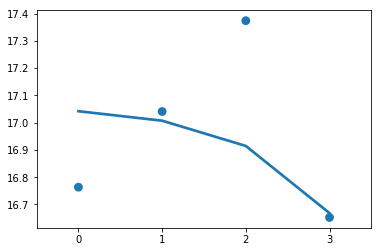

[17.04192267 17.01531688 16.9549396  16.81792365]
Glucose(mmol/L)


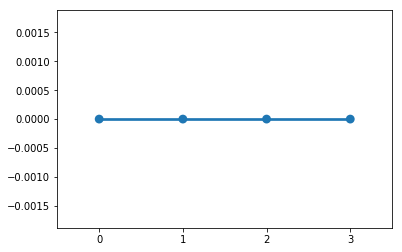

[-5.e-324 -5.e-324 -5.e-324 -5.e-324]
Lactate(mmol/L)


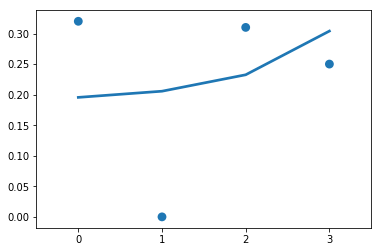

[0.19550424 0.20322642 0.2207506  0.26051874]
Glutamate(mmol/L)


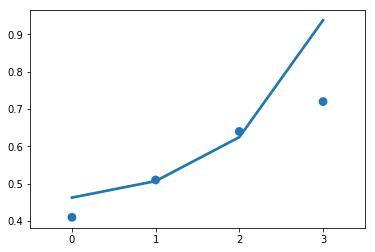

[0.46268754 0.49651733 0.57328828 0.74750685]
NH4(mmol/L)


In [10]:
for i in f:
    y=np.array(list(t[['Day 0', 'Day 1.2', 'Day 2.2', 'Day 3.2']].T[i]))
    param, cov = curve_fit(nonlinear_fit, x, y, p0=[1, 3])
    list_y = []
    for num in x:
        list_y.append( param[1] - param[0]* np.exp(np.log(2)/17*24*num))
        
    sns.pointplot(x=x, y=y, join=False)
    sns.pointplot(x=x, y=np.array(list_y), markers="")
    plt.show()
    print(nonlinear_fit(x, param[0], param[1]))
    print(i)